## Problem: Network Delay Time
LeetCode: 743

https://leetcode.com/problems/network-delay-time/description/

You are given a network of n nodes, labeled from 1 to n. You are also given times, a list of travel times as directed edges times[i] = (ui, vi, wi), where ui is the source node, vi is the target node, and wi is the time it takes for a signal to travel from source to target.

We will send a signal from a given node k. Return the minimum time it takes for all the n nodes to receive the signal. If it is impossible for all the n nodes to receive the signal, return -1.

 

Example 1:

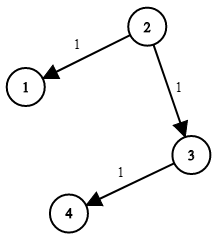

    Input: times = [[2,1,1],[2,3,1],[3,4,1]], n = 4, k = 2
    Output: 2
Example 2:

    Input: times = [[1,2,1]], n = 2, k = 1
    Output: 1
Example 3:

    Input: times = [[1,2,1]], n = 2, k = 2
    Output: -1
 

Constraints:

    1 <= k <= n <= 100
    1 <= times.length <= 6000
    times[i].length == 3
    1 <= ui, vi <= n
    ui != vi
    0 <= wi <= 100
    All the pairs (ui, vi) are unique. (i.e., no multiple edges.)

## Dijkstra Algorithm:
“Dijkstra’s algorithm” solves the “single-source shortest path” problem in a weighted directed graph with non-negative weights.
It uses a “greedy approach”. Each step selects the “minimum weight” from the currently reached vertices to find the “shortest path” to other vertices.

Time complexity : O(V+ElogV)
Space Complexity : O(V)

## Approach:
objective of this problem is to find the fastest path from node kkk to every other node. This is a typical use case for the Single Source Shortest Path algorithm. Hence, In this approach, we will use Dijkstra's Algorithm to find the fastest path to every node from node k.
We will start with node kkk and then iterate over every adjacent node neighborNode.
we will use a priority queue to traverse the nodes in increasing order of the time required to reach them. Therefore, in each iteration, we will visit the node with the shortest travel time. This will help us in finding the fastest time path first.
Since need to find the time taken to receive signal for all nodes, so result would be the max time.

In [41]:
import heapq as hq
def networkDelayTime(times, n, k):
    adj = {}
    for time in times:
        sNode = time[0]
        destNode = time[1]
        t = time[2]
        if sNode not in adj:
            adj[sNode] = []
        adj[sNode].append((t,destNode))
    signalReceivedTime = [float("inf")] * (n+1)
    signalReceivedTime[k] = 0
    dijkstra(adj, signalReceivedTime, k)
    result = max(signalReceivedTime[1:])
    return result if result != float("inf") else -1

def dijkstra(adj, signalReceivedTime, k):
    minHeap = []
    hq.heappush(minHeap, (0, k))
    while minHeap:
        t, node = hq.heappop(minHeap)
        if t > signalReceivedTime[node]:
            continue
        if node not in adj:
            continue
        for pair in adj[node]:
            desTime = pair[0]
            destNode = pair[1]
            if signalReceivedTime[destNode] > t + desTime:
                signalReceivedTime[destNode] = t + desTime
                hq.heappush(minHeap, (signalReceivedTime[destNode], destNode))
        
    
    

In [42]:
times = [[2,1,1],[2,3,1],[3,4,1]]
n = 4
k = 2
networkDelayTime(times, n, k)

2

In [43]:
times = [[1,2,1]]
n = 2
k = 1
networkDelayTime(times, n, k)

1

In [44]:
times = [[1,2,1]]
n = 2
k = 2
networkDelayTime(times, n, k)

-1